In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

2023-07-20 14:43:37.586338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# !unzip cats_and_dogs.zip

--2023-07-20 14:49:37--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>]  67.43M  48.6MB/s    in 1.4s    

2023-07-20 14:49:39 (48.6 MB/s) - ‘cats_and_dogs.zip’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating: __MACO

In [3]:
# !rm cats_and_dogs.zip

In [4]:
# Path and directory for data
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
# Get data preprocessed directly from directory
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "binary")

test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 1,
    classes = ["test"]
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


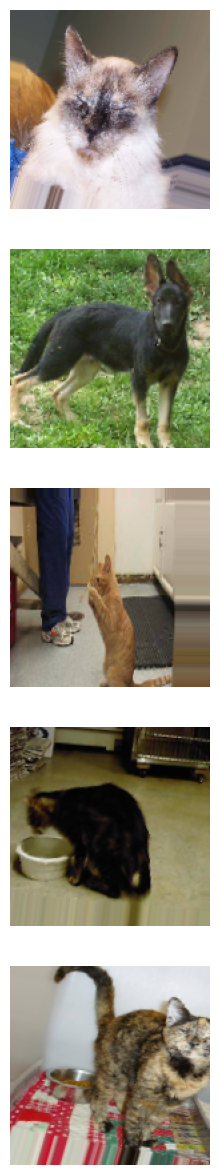

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# train_image_generator = ImageDataGenerator(rescale = 1/255,
#                                            rotation_range = 20,
#                                            width_shift_range=0.2,
#                                            height_shift_range=0.2,
#                                            shear_range=0.2,
#                                            zoom_range=0.2,
#                                            horizontal_flip=True)

Found 2000 images belonging to 2 classes.


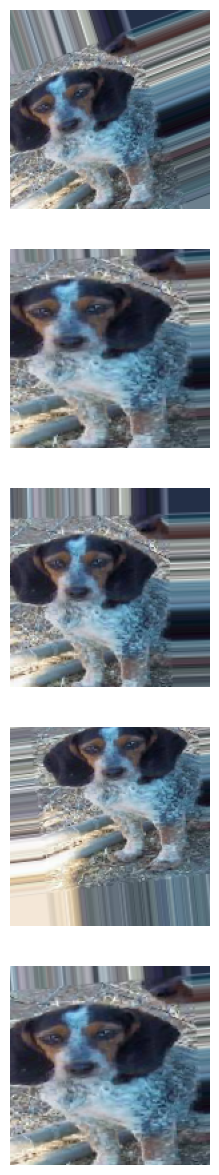

In [ ]:
# train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                      directory=train_dir,
#                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                      class_mode='binary')

# augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# plotImages(augmented_images)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation = "relu", input_shape = train_data_gen.image_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 78400)             0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [6]:
STEPS_PER_EPOCH = train_data_gen.n // train_data_gen.batch_size
VALIDATION_STEPS = val_data_gen.n // val_data_gen.batch_size
VALIDATION_STEPS, STEPS_PER_EPOCH

(7, 15)

In [ ]:
history = model.fit(x = train_data_gen,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = val_data_gen,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_steps = VALIDATION_STEPS
                    )

Epoch 1/15
15/15 [==============================] - 123s 8s/step - loss: 0.9805 - accuracy: 0.5021 - val_loss: 0.6897 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 127s 8s/step - loss: 0.6875 - accuracy: 0.5374 - val_loss: 0.6703 - val_accuracy: 0.5949
Epoch 3/15
15/15 [==============================] - 118s 8s/step - loss: 0.6702 - accuracy: 0.5593 - val_loss: 0.6440 - val_accuracy: 0.6194
Epoch 4/15
15/15 [==============================] - 117s 8s/step - loss: 0.6584 - accuracy: 0.5919 - val_loss: 0.6521 - val_accuracy: 0.5558
Epoch 5/15
15/15 [==============================] - 119s 8s/step - loss: 0.6417 - accuracy: 0.6149 - val_loss: 0.6649 - val_accuracy: 0.5982
Epoch 6/15
15/15 [==============================] - 117s 8s/step - loss: 0.6569 - accuracy: 0.5881 - val_loss: 0.6638 - val_accuracy: 0.5536
Epoch 7/15
15/15 [==============================] - 129s 9s/step - loss: 0.6609 - accuracy: 0.5753 - val_loss: 0.6329 - val_accuracy: 0.6272
Epoch 8/15
15

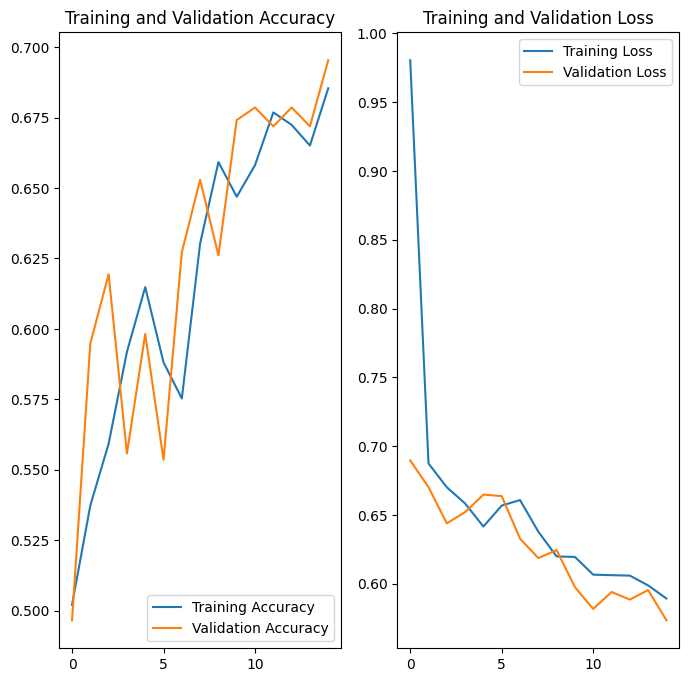

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred = model.predict(test_data_gen)
y_pred_list = y_pred.flatten().tolist()
probabilities = []
for proba in y_pred_list:
  if proba >= 0.5:
    probabilities.append(1)
  else:
    probabilities.append(0)

50/50 [==============================] - 1s 16ms/step


In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"The model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
